# 🚀 Rekomendasi Makanan Indonesia
Collaborative Google Colab Template

## 👥 Team Members:
- Member 1: MC184D5X0482 - Rensa Ayu Lestari - Universitas Andalas
- Member 2: MC827D5X0900 - Susi Angelina
- Member 3: MC604D5Y0876 - Muhamad Tegar Wijaya

## 📌 Objective:
Build a machine learning model to recomended food indonesia

### 1. Import Library
Kita menggunakan library Python berikut untuk membangun model klasifikasi obesitas berbasis TensorFlow:

-pandas, numpy: Untuk manipulasi dan analisis data.

- sklearn.preprocessing.StandardScaler: Untuk melakukan normalisasi fitur agar model dapat belajar lebih optimal.

- sklearn.model_selection.train_test_split: Digunakan untuk membagi dataset menjadi data pelatihan dan pengujian.

- tensorflow.keras.models.Sequential & tensorflow.keras.layers.Dense: Untuk membangun arsitektur model deep learning secara berurutan dan fleksibel.

- sklearn.metrics.pairwise.cosine_similarity: Opsional, digunakan untuk mengukur kemiripan antar data jika dibutuhkan analisis berbasis jarak atau kemiripan.

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics.pairwise import cosine_similarity


### 2. Load Dataset
Dataset dimuat dari file CSV.

---

In [29]:
data = pd.read_csv('/content/nutrition.csv')  # sesuaikan path-nya
print(data.head())

data['name_lower'] = data['name'].str.lower()

   id  calories  proteins   fat  carbohydrate                name  \
0   1     280.0       9.2  28.4           0.0                Abon   
1   2     513.0      23.7  37.0          21.3        Abon haruwan   
2   3       0.0       0.0   0.2           0.0           Agar-agar   
3   4      45.0       1.1   0.4          10.8  Akar tonjong segar   
4   5      37.0       4.4   0.5           3.8       Aletoge segar   

                                               image  
0  https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...  
1  https://img-global.cpcdn.com/recipes/cbf330fbd...  
2  https://res.cloudinary.com/dk0z4ums3/image/upl...  
3  https://images.tokopedia.net/img/cache/200-squ...  
4  https://nilaigizi.com/assets/images/produk/pro...  


### 3. Data Preprocessing
**Hapus Missing Value:**
- data.dropna(inplace=True)
Menghapus baris data yang memiliki nilai kosong agar tidak mengganggu proses analisis atau pelatihan model.

**Membersihkan Kolom 'name':**
- data['name_clean'] = data['name'].str.lower().str.strip()
Membersihkan teks pada kolom name dengan mengubah huruf menjadi kecil (lowercase) dan menghapus spasi di awal/akhir kata.

**Memilih Fitur yang Relevan:**
- X = data[['calories', 'proteins', 'fat', 'carbohydrate']]
Menentukan fitur numerik yang akan digunakan dalam model, yaitu kalori, protein, lemak, dan karbohidrat.

**Normalisasi Data:**
- scaler = StandardScaler()
- scaled_features = scaler.fit_transform(data[features])
- Melakukan standardisasi (normalisasi) agar data berada dalam skala yang sama (mean = 0, std = 1),

**Menyimpan Data yang Telah Dinormalisasi:**
- X = pd.DataFrame(scaled_features, columns=features)
- Hasil normalisasi dikonversi kembali ke dalam bentuk DataFrame agar lebih mudah diproses ke tahap berikutnya.


In [30]:
# Hapus missing value (atau bisa pakai imputasi jika perlu)
data.dropna(inplace=True)

data['name_clean'] = data['name'].str.lower().str.strip()


X = data[['calories', 'proteins', 'fat', 'carbohydrate']]

# Normalisasi kolom numerik
features = ['calories', 'proteins', 'fat', 'carbohydrate']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_features = scaler.fit_transform(data[features])

# Simpan data yang telah dinormalisasi ke dataframe baru
X = pd.DataFrame(scaled_features, columns=features)


### 4. Split Dataset
Membagi dataset menjadi data latih dan data uji:

- X adalah data fitur yang sudah dinormalisasi.

- test_size=0.2 berarti 20% data digunakan sebagai data uji (test set), dan 80% sebagai data latih (train set).

- random_state=42 digunakan agar hasil pembagian data konsisten setiap kali dijalankan (reproducible).


In [31]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


### 5. Model Machine Learning
**Membangun model Neural Network dengan Sequential:**

- Layer 1: Dense(64, activation='relu')
Layer pertama dengan 64 neuron dan fungsi aktivasi ReLU, menerima input sebanyak 4 fitur.

- Layer 2: Dense(32, activation='relu')
Layer tersembunyi kedua dengan 32 neuron, juga menggunakan aktivasi ReLU.

- Output Layer: Dense(4, activation='linear')
Layer output dengan 4 neuron dan aktivasi linear, digunakan untuk regresi terhadap 4 nilai kontinu (seperti kalori, protein, lemak, karbohidrat).

**Menyusun model dengan compile:**
- Optimizer: adam, digunakan untuk mengoptimalkan proses pembelajaran model.

- Loss Function: mse (Mean Squared Error), cocok untuk kasus regresi karena menghitung rata-rata kuadrat selisih antara prediksi dan nilai aktual.
---

In [32]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(4, activation='linear')  # Output tetap 4 fitur
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Train Model
**Melatih model dengan data latih:**
- X_train sebagai input dan target:
Karena input dan target sama (X_train, X_train), ini menyerupai autoencoder, yaitu model belajar merekonstruksi data input itu sendiri.

- epochs=50:
Model akan dilatih selama 50 siklus penuh terhadap seluruh dataset.

- batch_size=8:
Model memproses data dalam kelompok kecil berisi 8 sampel sekaligus saat satu langkah training.

- verbose=0:
Training dijalankan tanpa menampilkan log proses di terminal (mode diam).

In [33]:
model.fit(X_train, X_train, epochs=50, batch_size=8, verbose=0)
# Ini mirip autoencoder: input dan target sama => belajar representasi makanan


# 6. Validation Statistik (opsional lanjutan)


# Visualisasi Error Model (Validation MSE)
- Membuat visualisai Error Model

<ipython-input-34-1752464742>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


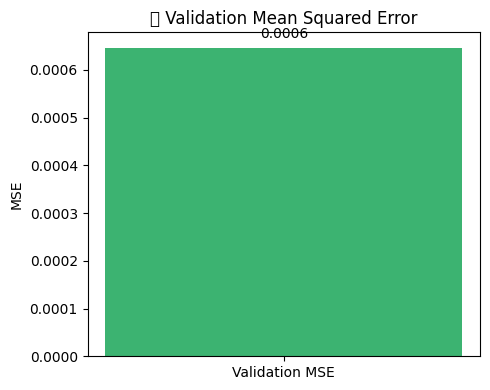

In [34]:
import matplotlib.pyplot as plt

# === Visualisasi MSE pada Data Validasi ===
fig, ax = plt.subplots(figsize=(5, 4))
bar = ax.bar(['Validation MSE'], [mse], color='mediumseagreen')

# Tampilkan nilai di atas bar
for rect in bar:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5),  # offset teks
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_ylabel("MSE")
ax.set_title("📉 Validation Mean Squared Error")
plt.tight_layout()
plt.show()


# Visualisasi Training dan Validation Loss
- Menampilkan visualisai training dan validation loss

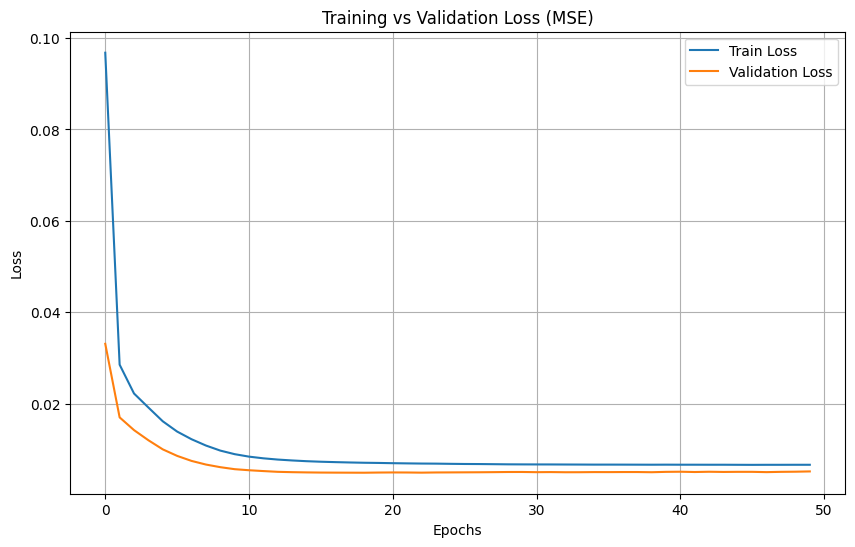

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss (MSE)")
plt.grid(True)
plt.show()


In [36]:
from IPython.display import Image, display
from urllib.request import urlopen
from urllib.error import URLError, HTTPError

def recommend_food(food_name, top_n=3):
    # Preprocessing input: lowercase dan strip spasi
    food_name_clean = food_name.lower().strip()

    # Siapkan kolom bantu yang sudah dibersihkan juga (lower + strip)
    if 'name_clean' not in data.columns:
        data['name_clean'] = data['name'].str.lower().str.strip()

    # Cek apakah makanan tersedia
    if food_name_clean not in data['name_clean'].values:
        # Coba cari suggestion jika user typo atau beda format
        suggestions = data[data['name_clean'].str.contains(food_name_clean, na=False)]
        if not suggestions.empty:
            print("❌ Makanan tidak ditemukan. Apakah maksud Anda salah satu dari berikut?")
            print(suggestions['name'].tolist())
        else:
            print("❌ Maaf, dataset belum memiliki data makanan tersebut.")
        return

    # Ambil index makanan
    food_index = data[data['name_clean'] == food_name_clean].index[0]
    input_nutrisi = X_scaled[food_index].reshape(1, -1)

    # Embedding
    input_embed = model.predict(input_nutrisi, verbose=0)
    all_embeddings = model.predict(X_scaled, verbose=0)

    # Cosine similarity
    similarities = cosine_similarity(input_embed, all_embeddings)[0]
    similar_indices = similarities.argsort()[::-1][1:top_n+1]

    # Info makanan input
    nama_input = data.loc[food_index, 'name']
    print(f"\n🍽️ Informasi Gizi '{nama_input}':")
    print(data.loc[food_index, ['calories', 'proteins', 'fat', 'carbohydrate']])
    print("📷 Gambar Makanan:")
    try:
        display(Image(url=data.loc[food_index, 'image']))
    except (HTTPError, URLError):
        print("🚫 Gambar tidak tersedia")

    # Rekomendasi
    print(f"\n🔁 Rekomendasi makanan dengan gizi mirip:\n")
    for idx in similar_indices:
        name = data.loc[idx, 'name']
        nutrisi = data.loc[idx, ['calories', 'proteins', 'fat', 'carbohydrate']]
        img_url = data.loc[idx, 'image']

        print(f"🍽️ {name}")
        print(nutrisi)
        print("📷 Gambar:")
        try:
            display(Image(url=img_url))
        except (HTTPError, URLError):
            print("🚫 Gambar tidak tersedia")
        print("—" * 40)


In [37]:
recommend_food("Abon", top_n=3)


🍽️ Informasi Gizi 'Abon':
calories        280.0
proteins          9.2
fat              28.4
carbohydrate      0.0
Name: 0, dtype: object
📷 Gambar Makanan:



🔁 Rekomendasi makanan dengan gizi mirip:

🍽️ Ikan Asin sirinding goreng
calories        319.0
proteins          6.9
fat              31.7
carbohydrate      0.0
Name: 416, dtype: object
📷 Gambar:


————————————————————————————————————————
🍽️ Bebek alabio daging segar
calories        303.0
proteins         11.3
fat              27.0
carbohydrate      3.7
Name: 87, dtype: object
📷 Gambar:


————————————————————————————————————————
🍽️ Pencok lele masakan
calories        372.0
proteins          7.8
fat              36.3
carbohydrate      3.5
Name: 976, dtype: object
📷 Gambar:


————————————————————————————————————————


In [ ]:
model.save("nutrisi_rekomendasi.keras")


In [ ]:
import joblib
joblib.dump(scaler, "scaler_nutrisi.pkl")


['scaler_nutrisi.pkl']